### <p style="text-align: right;"> &#9989; Jacob Jensen

#### <p style="text-align: right;"> &#9989; John Romig, Kyleigh Phillips, Luke Layman, Adam Romund, Dave Yonkers

# Day 16 In-Class Assignment
---

## How popular/unpopular is Donald Trump?

<img src="https://i.imgur.com/ZAvZ0ie.png" width=800px>

Data from https://github.com/fivethirtyeight/data

## Fitting approval rating data and making predictions

In this assignment we're going to look at the current president's approval rating as a function of time based on polling data.

The **learning goals** of the assignment are to:

* Practice fitting data using the functions provided to you by the Python Packages NumPy and SciPy.
* Using your model and fit to the data, explore how well your model can predict the future.

## Assignment instructions

Work with your group to complete this assignment. Instructions for submitting this assignment are at the end of the notebook. The assignment is due at the end of class.

---
### Loading and viewing the data

On D2L, there is a file named "trump_ratings_first500.csv" make sure you download that file and put it in the same place as this jupyter notebook.

**Task**: Using Pandas, **read in the data file** and **look at the data** by displaying the dataframe or information about the dataframe using some of the Pandas functions you've learned up to this point. Then, **plot the approval and disapproval ratings** to get something that looks similar to the plot above. You'll want to look at the [`plot_date`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot_date.html) function in matplotlib and make use of the 'datenumber' column in the data, which is a number that can be converted into a calendar date. (You can click on the function name to access the documentation)

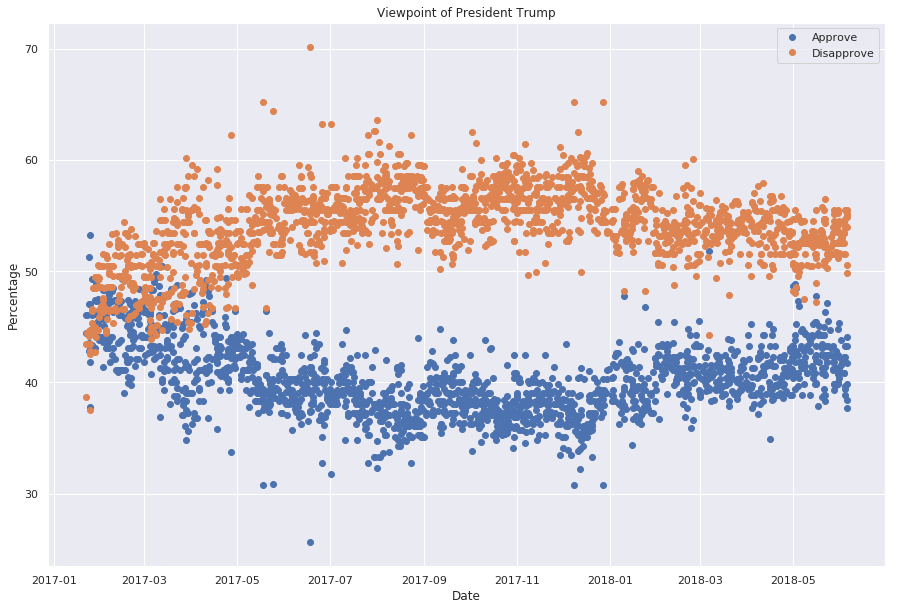

In [67]:
# Put your code here
import matplotlib.pyplot as plt
import pandas as pd
trumpData = pd.read_csv("trump_ratings_first500.csv")

plt.figure(figsize = (15,10))
plt.plot_date(trumpData['datenumber'], trumpData['adjusted_approve'], label = 'Approve')
plt.plot_date(trumpData['datenumber'], trumpData['adjusted_disapprove'], label = 'Disapprove')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Viewpoint of President Trump')
plt.show()

---
### Linear Regression

As a first pass, your goal is to produce a fit to the data using a linear model. What NumPy function can you use to do this? You should be able to use something that you learned in the pre-class assignment.

**Task**: Create a linear fit to the approval and disapproval ratings using a function from NumPy. **Make a plot of the data along with the best fit line**. What are the parameters for your best fit? **Print out those parameter values**. *Something to think about*: once you have your best fit parameters, what's the easiest way to use those values to plot your model? (*Hint*: there is a NumPy function that takes your fit and creates a function for you)

Disapproval Coefficient Values : [ 6.25681161e-03 -4.55459996e+03]
Approval Coefficient Values : [-4.60402725e-03  3.43151492e+03]


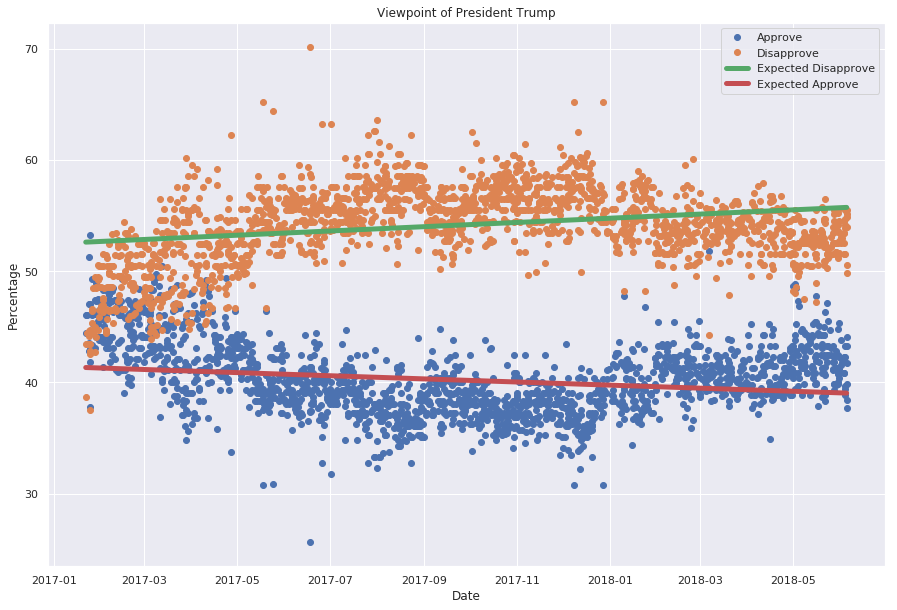

In [54]:
# Put your code here
import seaborn as sns
import numpy as np
sns.set()

appCoeff = np.polyfit(trumpData['datenumber'], trumpData['adjusted_approve'], 1)
disCoeff = np.polyfit(trumpData['datenumber'], trumpData['adjusted_disapprove'], 1)

print('Disapproval Coefficient Values : {}'.format(disCoeff))
print('Approval Coefficient Values : {}'.format(appCoeff))

disFunc = np.poly1d(disCoeff)
appFunc = np.poly1d(appCoeff)

disExpected = disFunc( trumpData['datenumber'])
appExpected = appFunc( trumpData['datenumber'])

plt.figure(figsize = (15,10))
plt.plot_date(trumpData['datenumber'], trumpData['adjusted_approve'], label = 'Approve')
plt.plot_date(trumpData['datenumber'], trumpData['adjusted_disapprove'], label = 'Disapprove')

plt.plot(trumpData['datenumber'], disExpected, label = 'Expected Disapprove', linewidth = 5)
plt.plot(trumpData['datenumber'], appExpected, label = 'Expected Approve', linewidth = 5)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Viewpoint of President Trump')
plt.show()

---
### Higher order fitting

**Task**: Now try fitting the data with a higher order polynomial function. How would you determine how many powers are "enough"? Choose how many powers you want to include in your fit and then **make a plot of your best fit, along with the data, for both approval and disapproval ratings.**

Disapproval Coefficient Values : [ 2.30824538e-07 -5.10189827e-01  3.75889623e+05 -9.23140061e+10]
Approval Coefficient Values : [-1.39062336e-07  3.07409268e-01 -2.26518190e+05  5.56375372e+10]


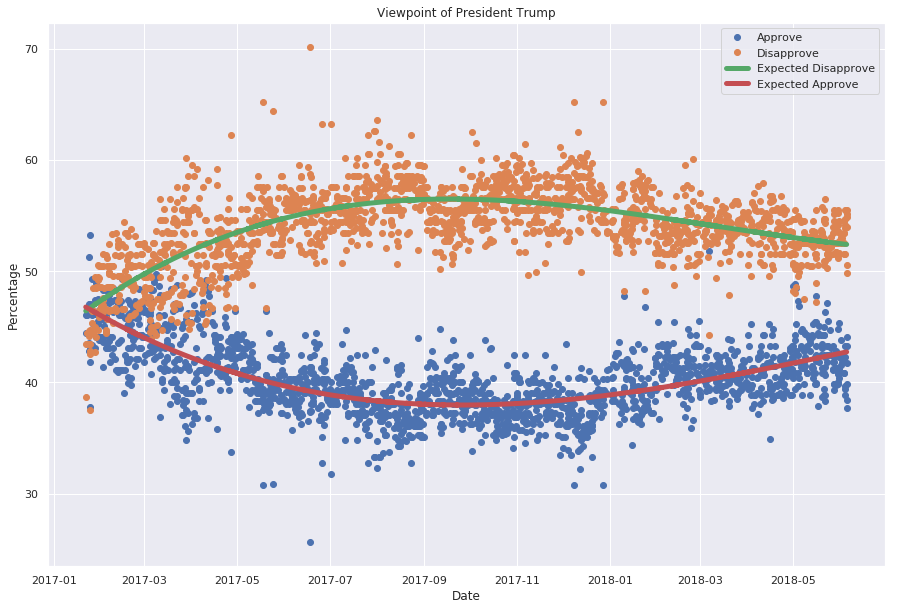

In [48]:
# Put your code here
appCoeff = np.polyfit(trumpData['datenumber'], trumpData['adjusted_approve'], 3)
disCoeff = np.polyfit(trumpData['datenumber'], trumpData['adjusted_disapprove'], 3)

print('Disapproval Coefficient Values : {}'.format(disCoeff))
print('Approval Coefficient Values : {}'.format(appCoeff))

disFunc = np.poly1d(disCoeff)
appFunc = np.poly1d(appCoeff)

disExpected = disFunc( trumpData['datenumber'])
appExpected = appFunc( trumpData['datenumber'])

plt.figure(figsize = (15,10))
plt.plot_date(trumpData['datenumber'], trumpData['adjusted_approve'], label = 'Approve')
plt.plot_date(trumpData['datenumber'], trumpData['adjusted_disapprove'], label = 'Disapprove')

plt.plot(trumpData['datenumber'], disExpected, label = 'Expected Disapprove', linewidth = 5)
plt.plot(trumpData['datenumber'], appExpected, label = 'Expected Approve', linewidth = 5)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Viewpoint of President Trump')
plt.show()


### Fitting with an arbitrary function

What if we think that the data follows a function with a form that is different than that of a polynomial? This is where curvefit comes in.  Let's try fitting the approval and disapproval ratings using a cosine function, the similar to the one from our pre-class assignment:

$$ f(x) = A \cos (Bx) + C $$

**Task**: Define a python function that computes the above mathematical function and then **use that function to fit the data using SciPy's `curve_fit` function**. Plot the resulting fit along with the data for just the disapproval ratings.

Is $f(x)$ a good choice for fitting the data? If not, is there a reason why this is the case? Does it mean the function is a bad choice or is the `curve_fit` function just not returning sensible results?

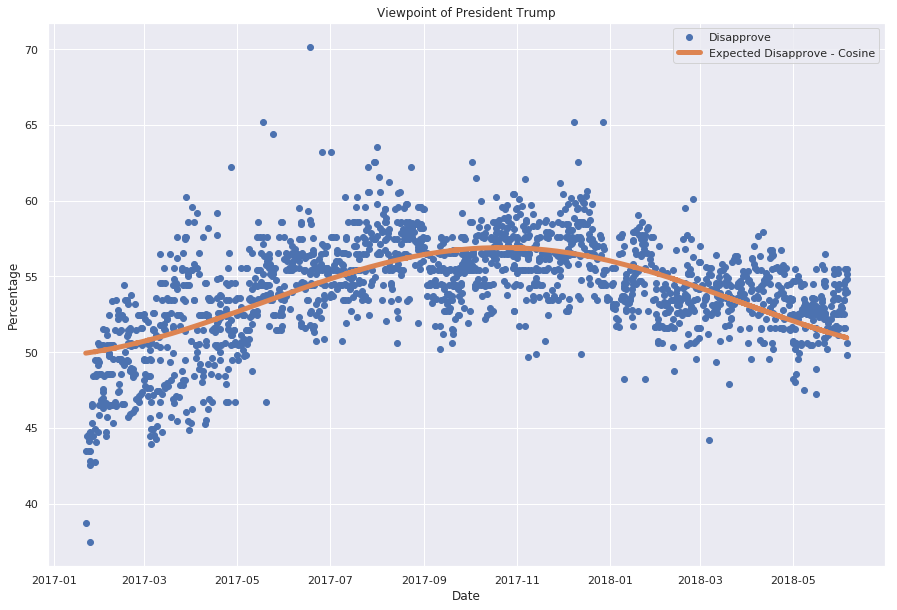

In [53]:
# Put your code here
from scipy.optimize import curve_fit

def func(x, A, B, C):
    return (A * np.cos(B * x)) + C

popt, pcov = curve_fit(func, trumpData['datenumber'], trumpData['adjusted_disapprove'], p0 = [1, .01, 0])

aExp = popt[0]
bExp = popt[1]
cExp = popt[2]

yDisCos = func(trumpData['datenumber'], aExp, bExp, cExp)

plt.figure(figsize = (15,10))

plt.plot_date(trumpData['datenumber'], trumpData['adjusted_disapprove'], label = 'Disapprove')

plt.plot(trumpData['datenumber'], yDisCos, label = 'Expected Disapprove - Cosine', linewidth = 5)


plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Viewpoint of President Trump')
plt.show()




---
## Comparing our fit to new data

One of the useful features of coming up with a best fit model to a set of data is that we can use that model to make predictions about what new data might look like.

**Task**: Using your linear fit and another best fit of your choosing, make a plot that predicts an additional **500** days of model rating values for just the disapproval ratings. Specifically, we just want to extend the best fit lines an additional 500 days. *Hint*: This would mean going all the way to a "datenumber" value that is the current max + 500.

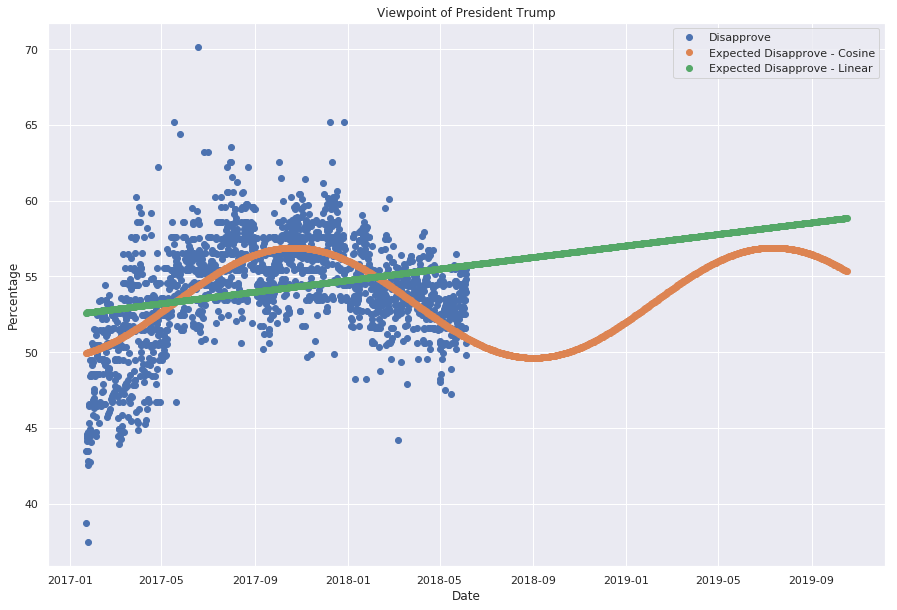

In [61]:
# Put your code here
new_max = np.arange(trumpData['datenumber'].min(), trumpData['datenumber'].max() + 500, 1)

yDisCos = func(new_max, aExp, bExp, cExp)
disExpected = disFunc(new_max)

plt.figure(figsize = (15,10))
plt.plot_date(trumpData['datenumber'], trumpData['adjusted_disapprove'], label = 'Disapprove')
plt.plot_date(new_max, yDisCos, label = 'Expected Disapprove - Cosine', linewidth = 5)
plt.plot_date(new_max, disExpected, label = 'Expected Disapprove - Linear', linewidth = 5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Viewpoint of President Trump')
plt.show()

### How well do our models do?

It turns out, we have approval ratings data that goes all the way to just this past week, all the way to **October 24th**.

Let your instructor know that you're ready to look at the new data and compare it to your model. Then, log into Slack. The instructor will share a new data file that contains the new ratings information.

**Task**: Read that new file into Pandas and plot both the old and new data, along with your two best fit lines from the previous task. **How well do your models fit the data?** Can you think of a way that would allow you to quantify how "good" your fit is?

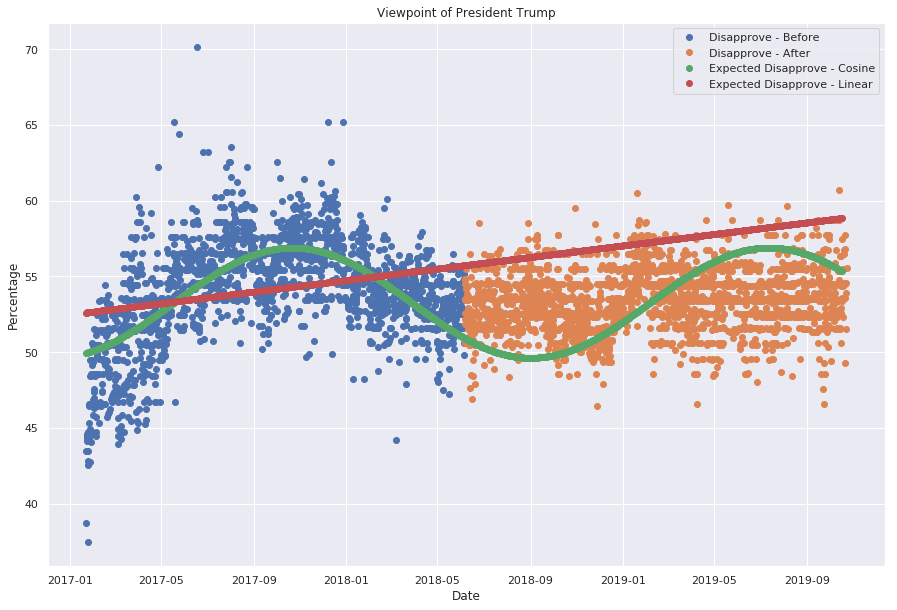

In [65]:
trumpDataNew = pd.read_csv("trump_ratings_after500.csv")
plt.figure(figsize = (15,10))

plt.plot_date(trumpData['datenumber'], trumpData['adjusted_disapprove'], label = 'Disapprove - Before')
plt.plot_date(trumpDataNew['datenumber'], trumpDataNew['adjusted_disapprove'], label = 'Disapprove - After')

plt.plot_date(new_max, yDisCos, label = 'Expected Disapprove - Cosine', linewidth = 5)
plt.plot_date(new_max, disExpected, label = 'Expected Disapprove - Linear', linewidth = 5)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Viewpoint of President Trump')
plt.show()

The cosine fit seems to be a decent fit but the linear fit is not a good fit for the data. To measure how "good" out fit is, we could look at residuals and sum them to see if it adds to somewhere near zero

### Fitting all of the data

Sometimes, when we acquire new data, we might have to revise our model if the new data is not supported by the model. This is a common practice in modeling and data science. If you trust the data and your model no longer matches the data, then something must have been wrong about your model!

Now that you have all of the data, trying finding the best fit to the full dataset. **What sort of model did you choose? How does it compare to your original fit to only part of the data?**

**Hint**: When making the new fit, it might be easiest to combine the two dataframes into one new dataframe. You should be able to do this using the `concat` function in Pandas. Check out the example [here](https://pandas.pydata.org/pandas-docs/stable/merging.html).

Disapproval Coefficient Values : [ 6.06580133e-08 -1.34095993e-01  9.88148287e+04 -2.42720885e+10]


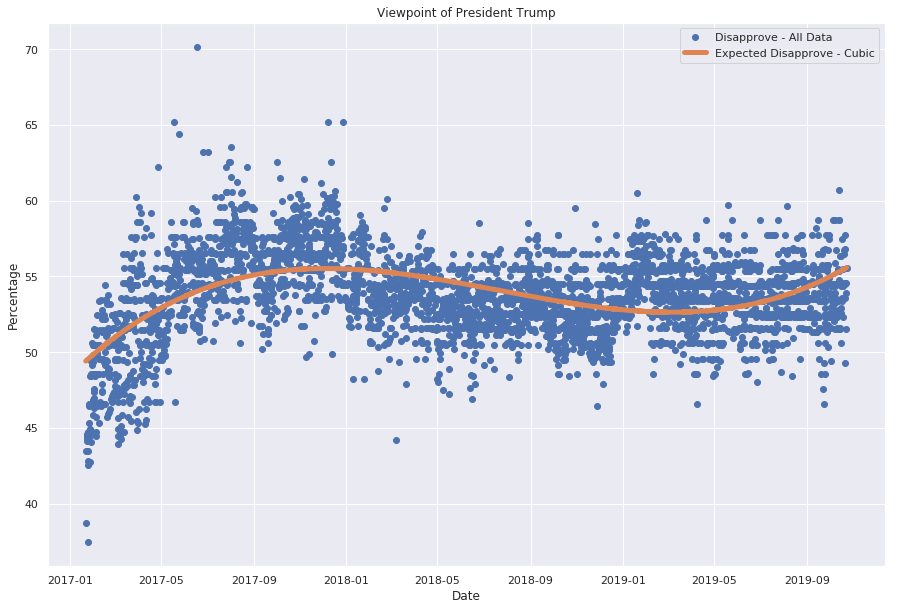

In [77]:
# Put your code here
trumpDataAll = pd.concat((trumpData, trumpDataNew))

disCoeff = np.polyfit(trumpDataAll['datenumber'], trumpDataAll['adjusted_disapprove'], 3)

print('Disapproval Coefficient Values : {}'.format(disCoeff))

disFunc = np.poly1d(disCoeff)

disExpected = disFunc( trumpDataAll['datenumber'])

plt.figure(figsize = (15,10))

plt.plot_date(trumpDataAll['datenumber'], trumpDataAll['adjusted_disapprove'], label = 'Disapprove - All Data')

plt.plot(trumpDataAll['datenumber'], disExpected, label = 'Expected Disapprove - Cubic', linewidth = 5)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Percentage')
plt.title('Viewpoint of President Trump')
plt.show()

The cubic function seems to fit the data well, better than the cosine function from before. 

---

## Congratulations, you're done!

Submit this assignment by uploading your notebook to the course Desire2Learn web page.  Go to the "In-Class Assignments" folder, find the appropriate submission link, and upload everything there. Make sure your name is on it!